# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

In [55]:
import pandas as pd
import numpy as np

### Question 1

#### Read the dataset

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-30-2020.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-05-31 02:32:45,34.223334,-82.461707,39,0,0,39,"Abbeville, South Carolina, US",159.008440,0.000000
1,22001.0,Acadia,Louisiana,US,2020-05-31 02:32:45,30.295065,-92.414197,412,23,0,389,"Acadia, Louisiana, US",664.034169,5.582524
2,51001.0,Accomack,Virginia,US,2020-05-31 02:32:45,37.767072,-75.632346,863,12,0,851,"Accomack, Virginia, US",2670.503775,1.390498
3,16001.0,Ada,Idaho,US,2020-05-31 02:32:45,43.452658,-116.241552,805,22,0,783,"Ada, Idaho, US",167.155675,2.732919
4,19001.0,Adair,Iowa,US,2020-05-31 02:32:45,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US",125.838926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,82604.0,NaN,Wales,United Kingdom,2020-05-31 02:32:45,52.130700,-3.783700,0,2294,0,0,"Wales, United Kingdom",0.000000,0.000000
3562,NaN,NaN,NaN,Nauru,2020-05-31 02:32:45,-0.522800,166.931500,0,0,0,0,Nauru,0.000000,0.000000
3563,NaN,NaN,Niue,New Zealand,2020-05-31 02:32:45,-19.054400,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
3564,NaN,NaN,NaN,Tuvalu,2020-05-31 02:32:45,-7.109500,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [57]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-05-31 02:32:45,34.223334,-82.461707,39,0,0,39,"Abbeville, South Carolina, US",159.008440,0.000000
1,22001.0,Acadia,Louisiana,US,2020-05-31 02:32:45,30.295065,-92.414197,412,23,0,389,"Acadia, Louisiana, US",664.034169,5.582524
2,51001.0,Accomack,Virginia,US,2020-05-31 02:32:45,37.767072,-75.632346,863,12,0,851,"Accomack, Virginia, US",2670.503775,1.390498
3,16001.0,Ada,Idaho,US,2020-05-31 02:32:45,43.452658,-116.241552,805,22,0,783,"Ada, Idaho, US",167.155675,2.732919
4,19001.0,Adair,Iowa,US,2020-05-31 02:32:45,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US",125.838926,0.000000


#### Show the information of the dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3024 non-null   float64
 1   Admin2               3024 non-null   object 
 2   Province_State       3384 non-null   object 
 3   Country_Region       3566 non-null   object 
 4   Last_Update          3566 non-null   object 
 5   Lat                  3491 non-null   float64
 6   Long_                3491 non-null   float64
 7   Confirmed            3566 non-null   int64  
 8   Deaths               3566 non-null   int64  
 9   Recovered            3566 non-null   int64  
 10  Active               3566 non-null   int64  
 11  Combined_Key         3566 non-null   object 
 12  Incidence_Rate       3491 non-null   float64
 13  Case-Fatality_Ratio  3498 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 390.2+ KB


#### Show the sum of missing values of features in the dataset

In [59]:
df.isnull().sum()

FIPS                   542
Admin2                 542
Province_State         182
Country_Region           0
Last_Update              0
Lat                     75
Long_                   75
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          75
Case-Fatality_Ratio     68
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [60]:
confirmed_by_country = df.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).reset_index()           
print("Confirmed cases by Country:")                                                                          
print(confirmed_by_country)                                                                                         

Confirmed cases by Country:
           Country_Region  Confirmed
0                      US    1765287
1                  Brazil     502914
2                  Russia     396575
3          United Kingdom     274215
4                   Spain     239228
..                    ...        ...
192              Kiribati          0
193  Winter Olympics 2022          0
194            Antarctica          0
195                 Tonga          0
196                 Samoa          0

[197 rows x 2 columns]


#### Show the number of Deaths by Country

In [61]:
deaths_by_country = df.groupby('Country_Region')['Deaths'].sum().sort_values(ascending=False).reset_index()                
print("\nDeaths by Country:")                                                                                 
print(deaths_by_country)  


Deaths by Country:
                       Country_Region  Deaths
0                                  US  104034
1                      United Kingdom   52374
2                               Italy   33340
3                              Brazil   28896
4                              France   28774
..                                ...     ...
192                          Holy See       0
193                           Grenada       0
194  Saint Vincent and the Grenadines       0
195                           Eritrea       0
196                              Laos       0

[197 rows x 2 columns]


#### Show the number of Recovered cases by Country

In [62]:
recovered_by_country = df.groupby('Country_Region')['Recovered'].sum().sort_values(ascending=False).reset_index()         
print("\nRecovered cases by Country:")                                                                        
print(recovered_by_country) 


Recovered cases by Country:
    Country_Region  Recovered
0               US     416461
1           Brazil     200892
2           Russia     167469
3          Germany     164908
4            Italy     155633
..             ...        ...
192     MS Zaandam          0
193   Korea, North          0
194       Kiribati          0
195         Tuvalu          0
196          Tonga          0

[197 rows x 2 columns]


#### Show the number of Active Cases by Country

In [63]:
active_by_country = df.groupby('Country_Region')['Active'].sum().sort_values(ascending=False).reset_index()                
print("\nActive cases by Country:")                                                                           
print(active_by_country) 


Active cases by Country:
       Country_Region   Active
0                  US  1668535
1              Brazil   469606
2      United Kingdom   234584
3              Russia   224551
4                Peru   135560
..                ...      ...
192      Korea, North        0
193  Papua New Guinea        0
194             Palau        0
195        Montenegro        0
196          Dominica        0

[197 rows x 2 columns]


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [64]:
# Latest numbers for all metrics by country                                                                   
latest_numbers = df.groupby('Country_Region').agg({                                                           
    'Confirmed': 'sum',                                                                                       
    'Deaths': 'sum',                                                                                          
    'Recovered': 'sum',                                                                                       
    'Active': 'sum'                                                                                           
}).sort_values('Confirmed', ascending=False).reset_index()                                                                
print("\nLatest numbers by Country:")                                                                         
print(latest_numbers) 


Latest numbers by Country:
           Country_Region  Confirmed  Deaths  Recovered   Active
0                      US    1765287  104034     416461  1668535
1                  Brazil     502914   28896     200892   469606
2                  Russia     396575    4555     167469   224551
3          United Kingdom     274215   52374       1187   234584
4                   Spain     239228   27125     150376    67747
..                    ...        ...     ...        ...      ...
192              Kiribati          0       0          0        0
193  Winter Olympics 2022          0       0          0        0
194            Antarctica          0       0          0        0
195                 Tonga          0       0          0        0
196                 Samoa          0       0          0        0

[197 rows x 5 columns]


### Question 3

### Show the countries with no recovered cases

In [65]:
no_recovered = latest_numbers[latest_numbers['Recovered'] == 0][['Country_Region','Recovered']]              
print("Countries with no recovered cases:")                                                                   
print(no_recovered)

Countries with no recovered cases:
           Country_Region  Recovered
184            MS Zaandam          0
187  Summer Olympics 2020          0
188                 Nauru          0
189                 Palau          0
190                Tuvalu          0
191          Korea, North          0
192              Kiribati          0
193  Winter Olympics 2022          0
194            Antarctica          0
195                 Tonga          0
196                 Samoa          0


#### Show the countries with no confirmed cases

In [66]:
no_confirmed = latest_numbers[latest_numbers['Confirmed'] == 0][['Country_Region', 'Confirmed']]                               
print("\nCountries with no confirmed cases:")                                                                 
print(no_confirmed) 


Countries with no confirmed cases:
           Country_Region  Confirmed
187  Summer Olympics 2020          0
188                 Nauru          0
189                 Palau          0
190                Tuvalu          0
191          Korea, North          0
192              Kiribati          0
193  Winter Olympics 2022          0
194            Antarctica          0
195                 Tonga          0
196                 Samoa          0


#### Show the countries with no deaths

In [67]:
no_deaths = latest_numbers[latest_numbers['Deaths'] == 0][['Country_Region','Deaths']]                                    
print("\nCountries with no deaths:")                                                                          
print(no_deaths) 


Countries with no deaths:
                       Country_Region  Deaths
139                            Uganda       0
142                           Vietnam       0
151                          Mongolia       0
156                          Cambodia       0
166                           Eritrea       0
168                            Bhutan       0
169  Saint Vincent and the Grenadines       0
172                       Timor-Leste       0
173                           Namibia       0
174                           Grenada       0
175                              Laos       0
176                              Fiji       0
177                       Saint Lucia       0
179                          Dominica       0
180             Saint Kitts and Nevis       0
182                          Holy See       0
183                        Seychelles       0
185                  Papua New Guinea       0
186                           Lesotho       0
187              Summer Olympics 2020       0
188    

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [68]:
top_10_confirmed = latest_numbers.nlargest(10, 'Confirmed')
print("\nTop 10 Countries with Confirmed Cases:")                                            
print(top_10_confirmed) 


Top 10 Countries with Confirmed Cases:
   Country_Region  Confirmed  Deaths  Recovered   Active
0              US    1765287  104034     416461  1668535
1          Brazil     502914   28896     200892   469606
2          Russia     396575    4555     167469   224551
3  United Kingdom     274215   52374       1187   234584
4           Spain     239228   27125     150376    67747
5           Italy     232664   33340     155633    43691
6          France     190743   28774      68386    93583
7         Germany     182842    8489     164908     9751
8           India     181827    5185      86936    89706
9          Turkey     163103    4515     126984    31604


#### Show the Top 10 Countries with Active cases

In [69]:
top_10_confirmed = latest_numbers.nlargest(10, 'Active')
print("\nTop 10 Countries with Active Cases:")                                            
print(top_10_confirmed) 


Top 10 Countries with Active Cases:
    Country_Region  Confirmed  Deaths  Recovered   Active
0               US    1765287  104034     416461  1668535
1           Brazil     502914   28896     200892   469606
3   United Kingdom     274215   52374       1187   234584
2           Russia     396575    4555     167469   224551
10            Peru     155671   20111      66447   135560
12           Chile      94858     997      40431    93861
6           France     190743   28774      68386    93583
8            India     181827    5185      86936    89706
4            Spain     239228   27125     150376    67747
5            Italy     232664   33340     155633    43691


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [70]:
import matplotlib.pyplot as plt

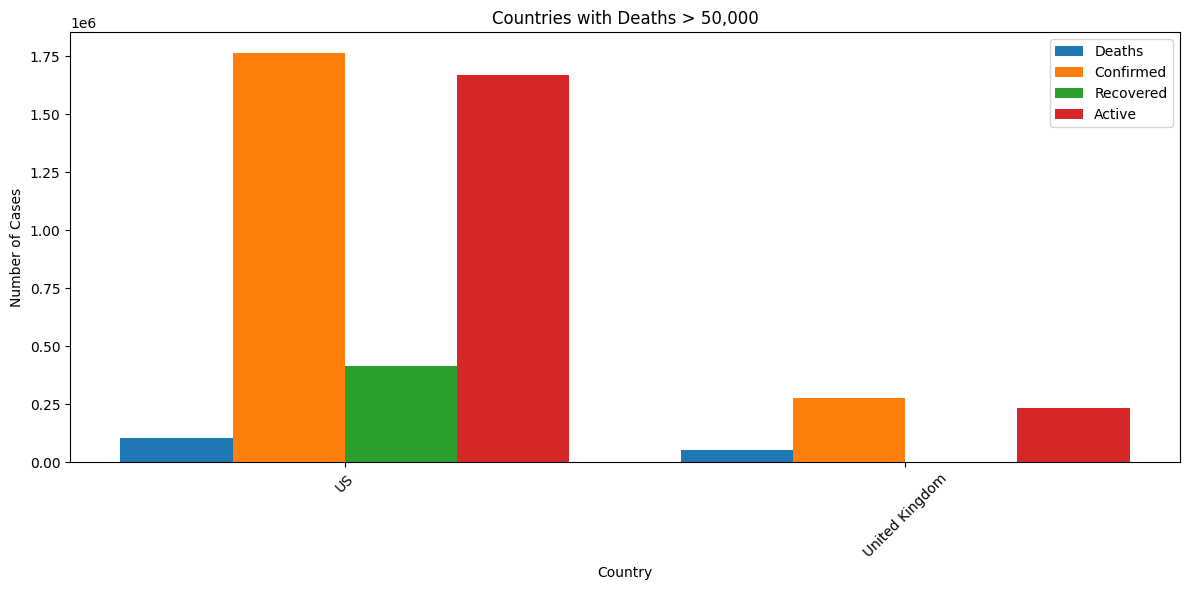

In [71]:
# Countries with deaths > 50,000                                                             
high_death_countries = latest_numbers[latest_numbers['Deaths'] > 50000]                      
                                                                                            
# Set up the plot                                                                            
plt.figure(figsize=(12, 6))                                                                  
                                                                                            
# Set the positions for the bars                                                             
x = np.arange(len(high_death_countries['Country_Region']))                                   
width = 0.2                                                            
                                                                                            
# Create bars for each metric                                                                
plt.bar(x - width*1.5, high_death_countries['Deaths'], width, label='Deaths')                
plt.bar(x - width/2, high_death_countries['Confirmed'], width, label='Confirmed')            
plt.bar(x + width/2, high_death_countries['Recovered'], width, label='Recovered')            
plt.bar(x + width*1.5, high_death_countries['Active'], width, label='Active')                
                                                                                            
# Customize the plot                                                                         
plt.title('Countries with Deaths > 50,000')                                                  
plt.xlabel('Country')                                                                        
plt.ylabel('Number of Cases')                                                                
plt.xticks(x, high_death_countries['Country_Region'], rotation=45)                           
plt.legend()                                                                                 
                                                                                            
# Adjust layout to prevent label cutoff                                                      
plt.tight_layout()                                                                           
                                                                                            
# Show the plot                                                                              
plt.show()  

### Question 6

### Plot Province/State wise Deaths in USA

In [72]:
import plotly.express as px

In [73]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

In [74]:
# Filter USA data                                                                                             
usa_data = df[df['Country_Region'] == 'US'] 
usa_data = usa_data[usa_data['Province_State'] != 'Recovered'] 

In [75]:
# Deaths by state                                                                                             
fig_deaths = px.bar(usa_data,                                                                                 
                x='Province_State',                                                                        
                y='Deaths',                                                                                
                title='Deaths by State in USA')                                                            
fig_deaths.update_xaxes(tickangle=45)                                                                         
fig_deaths.show() 

### Question 7

### Plot Province/State Wise Active Cases in USA

In [76]:
fig_active = px.bar(usa_data,                                                                                 
                x='Province_State',                                                                        
                y='Active',                                                                                
                title='Active Cases by State in USA')                                                      
fig_active.update_xaxes(tickangle=45)                                                                         
fig_active.show()  

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [77]:
fig_confirmed = px.bar(usa_data,                                                                              
                    x='Province_State',                                                                     
                    y='Confirmed',                                                                          
                    title='Confirmed Cases by State in USA') 
                                                                   
fig_confirmed.update_xaxes(tickangle=45)                                                                      
fig_confirmed.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [78]:
import plotly.express as px
import plotly.io as pio

In [79]:
# Convert Last_Update to datetime                                                                             
df['Last_Update'] = pd.to_datetime(df['Last_Update'])                                                         
                                                                                                            
# Group by date and sum confirmed cases                                                                       
worldwide_cases = df.groupby('Last_Update')['Confirmed'].sum().reset_index()                                  
                                                                                                            
# Create time series plot                                                                                     
fig = px.line(worldwide_cases,                                                                                
            x='Last_Update',                                                                                
            y='Confirmed',                                                                                  
            title='Worldwide Confirmed Cases Over Time')
            
pio.show(fig)

In [80]:
# Print unique dates to verify plot                                                             
print("Unique dates in the dataset:")                                                        
print(df['Last_Update'].unique())

Unique dates in the dataset:
<DatetimeArray>
['2020-05-31 02:32:45', '2021-04-02 15:13:53']
Length: 2, dtype: datetime64[ns]


### Explanation of the worldwide Confirmed Cases Over Time plot
It seems that dates from 2021 are present in the dataset which results in this sloped line graph going all the way to March 2021.